## Dataset Description

The includes lastest edition FIFA 2019 players attributes like Age, Nationality, Overall, Potential, Club, Value, Wage, Preferred Foot, International Reputation, Weak Foot, Skill Moves, Work Rate, Position, Jersey Number, Joined, Loaned From, Contract Valid Until, Height, Weight, LS, ST, RS, LW, LF, CF, RF, RW, LAM, CAM, RAM, LM, LCM, CM, RCM, RM, LWB, LDM, CDM, RDM, RWB, LB, LCB, CB, RCB, RB, Crossing, Finishing, Heading, Accuracy, ShortPassing, Volleys, Dribbling, Curve, FKAccuracy, LongPassing, BallControl, Acceleration, SprintSpeed, Agility, Reactions, Balance, ShotPower, Jumping, Stamina, Strength, LongShots, Aggression, Interceptions, Positioning, Vision, Penalties, Composure, Marking, StandingTackle, SlidingTackle, GKDiving, GKHandling, GKKicking, GKPositioning, GKReflexes, and Release Clause.

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter('ignore')

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
link = 'https://drive.google.com/file/d/10yllK8guBXr4Rp7LyZodbXCPV3xpW0ik/view?usp=sharing'

id = link.split("/")[-2] 
  
downloaded = drive.CreateFile({'id':id})  
downloaded.GetContentFile('Fifa.csv') 

## Reading the data

In [4]:
df = pd.read_csv('Fifa.csv')
# first 5 rows
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,...,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,...,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,...,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,...,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,...,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## EDA on the data

In [5]:
# shape of the dataframe

print('The dataframe has {} rows and {} columns'.format(df.shape[0],df.shape[1]))

The dataframe has 18207 rows and 89 columns


In [6]:
# descriptive stats of the dataset

df.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,52.298144,58.686712,42.909026,55.371001,47.170824,42.863153,52.711933,58.369459,64.614076,64.726967,63.503607,61.836610,63.966573,55.460047,65.089432,63.219946,65.311967,47.109973,55.868991,46.698276,49.958478,53.400903,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,17.379909,14.699495,17.694408,18.910371,18.395264,17.478763,15.327870,16.686595,14.927780,14.649953,14.766049,9.010464,14.136166,17.237958,11.820044,15.894741,12.557000,19.260524,17.367967,20.696909,19.529036,14.146881,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,7.000000,4.000000,4.000000,6.000000,3.000000,9.000000,5.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,44.000000,54.000000,30.000000,49.000000,34.000000,31.000000,43.000000,54.000000,57.000000,57.000000,55.000000,56.000000,56.000000,45.000000,58.000000,56.000000,58.000000,33.000000,44.000000,26.000000,38.000000,44.000000,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,48.000000,41.000000,56.000000,63.000000,67.000000,67.000000,66.000000,62.000000,66.000000,59.000000,66.000000,66.000000,67.000000,51.000000,59.000000,52.000000,55.000000,55.000000,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,64.000000,68.000000,57.000000,68.000000,62.000000,57.000000,64.000000,69.000000,75.000000,75.000000,74.000000,68.000000,74.000000,68.000000,73.000000,74.000000,74.000000,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,94.000000,93.000000,90.000000,97.000000,94.000000,94.000000,93.000000,96.000000,97.000000,96.000000,96.000000,96.000000,96.000000,95.000000,95.000000,96.000000,97.000000,94.000

In [7]:
# datatypes of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [8]:
# dropping columns which are useless

df.drop(columns = ['Unnamed: 0','ID','Photo','Flag','Club Logo',
                  'Joined','Loaned From','Body Type'
                   ,'Real Face','Jersey Number','Contract Valid Until','Height', 'Weight' ],inplace = True)

In [9]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
       'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
       'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
       'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [10]:
# displaying the null values

dict(df.isna().sum())

{'Acceleration': 48,
 'Age': 0,
 'Aggression': 48,
 'Agility': 48,
 'Balance': 48,
 'BallControl': 48,
 'CAM': 2085,
 'CB': 2085,
 'CDM': 2085,
 'CF': 2085,
 'CM': 2085,
 'Club': 241,
 'Composure': 48,
 'Crossing': 48,
 'Curve': 48,
 'Dribbling': 48,
 'FKAccuracy': 48,
 'Finishing': 48,
 'GKDiving': 48,
 'GKHandling': 48,
 'GKKicking': 48,
 'GKPositioning': 48,
 'GKReflexes': 48,
 'HeadingAccuracy': 48,
 'Interceptions': 48,
 'International Reputation': 48,
 'Jumping': 48,
 'LAM': 2085,
 'LB': 2085,
 'LCB': 2085,
 'LCM': 2085,
 'LDM': 2085,
 'LF': 2085,
 'LM': 2085,
 'LS': 2085,
 'LW': 2085,
 'LWB': 2085,
 'LongPassing': 48,
 'LongShots': 48,
 'Marking': 48,
 'Name': 0,
 'Nationality': 0,
 'Overall': 0,
 'Penalties': 48,
 'Position': 60,
 'Positioning': 48,
 'Potential': 0,
 'Preferred Foot': 48,
 'RAM': 2085,
 'RB': 2085,
 'RCB': 2085,
 'RCM': 2085,
 'RDM': 2085,
 'RF': 2085,
 'RM': 2085,
 'RS': 2085,
 'RW': 2085,
 'RWB': 2085,
 'Reactions': 48,
 'Release Clause': 1564,
 'ST': 2085,
 

In [ ]:
# dropping null values in 'Club' column

df = df.dropna(subset = ['Club'], axis = 0)

In [ ]:
# inspecting the 'Preferred foot' column

df['Preferred Foot'].value_counts()

Right    13756
Left      4162
Name: Preferred Foot, dtype: int64

In [ ]:
df[df['Preferred Foot'].isnull()].sample(10)

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
13248,L. McCullough,24,Northern Ireland,62,69,Tranmere Rovers,€375K,€2K,1461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13264,M. Chergui,29,France,62,62,Grenoble Foot 38,€300K,€1K,1620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13238,J. Stead,35,England,62,62,Notts County,€140K,€3K,1573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13237,J. Barrera,29,Nicaragua,62,62,Boyacá Chicó FC,€300K,€1K,1532,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13263,S. Bauer,25,Austria,62,66,FC Admira Wacker Mödling,€325K,€2K,1354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13275,E. González,23,Venezuela,62,70,Boyacá Chicó FC,€375K,€1K,1542,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13271,F. Sepúlveda,26,Chile,62,63,CD Antofagasta,€290K,€1K,1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13276,M. Al Amri,26,Saudi Arabia,62,63,Al Raed,€290K,€3K,1679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13280,Y. Ammour,19,France,62,77,Montpellier HSC,€650K,€2K,1478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13266,L. Bengtsson,20,Sweden,62,73,Hammarby IF,€525K,€1K,1549,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
# filling the null values with the 'ffill' method

df['Preferred Foot'].fillna(method = 'ffill', inplace = True)

In [ ]:
# since there are only 48 na values we are dropping the row which has null value

df = df.dropna(subset = ['International Reputation'], axis = 0)

In [ ]:
df['Height'].sample(10)

6812      6'3
6058      6'0
3385      6'1
9989     5'11
11644     5'8
13276    mean
17545     6'0
14322     6'1
14804     5'7
11636    5'10
Name: Height, dtype: object

In [ ]:
dict(df.isna().sum())

{'Acceleration': 48,
 'Age': 0,
 'Aggression': 48,
 'Agility': 48,
 'Balance': 48,
 'BallControl': 48,
 'CAM': 2040,
 'CB': 2040,
 'CDM': 2040,
 'CF': 2040,
 'CM': 2040,
 'Club': 0,
 'Composure': 48,
 'Crossing': 48,
 'Curve': 48,
 'Dribbling': 48,
 'FKAccuracy': 48,
 'Finishing': 48,
 'GKDiving': 48,
 'GKHandling': 48,
 'GKKicking': 48,
 'GKPositioning': 48,
 'GKReflexes': 48,
 'HeadingAccuracy': 48,
 'Height': 0,
 'Interceptions': 48,
 'International Reputation': 48,
 'Jumping': 48,
 'LAM': 2040,
 'LB': 2040,
 'LCB': 2040,
 'LCM': 2040,
 'LDM': 2040,
 'LF': 2040,
 'LM': 2040,
 'LS': 2040,
 'LW': 2040,
 'LWB': 2040,
 'LongPassing': 48,
 'LongShots': 48,
 'Marking': 48,
 'Name': 0,
 'Nationality': 0,
 'Overall': 0,
 'Penalties': 48,
 'Position': 48,
 'Positioning': 48,
 'Potential': 0,
 'Preferred Foot': 0,
 'RAM': 2040,
 'RB': 2040,
 'RCB': 2040,
 'RCM': 2040,
 'RDM': 2040,
 'RF': 2040,
 'RM': 2040,
 'RS': 2040,
 'RW': 2040,
 'RWB': 2040,
 'Reactions': 48,
 'Release Clause': 1323,
 'S

In [ ]:
df['LS'].fillna('0', axis = 0, inplace = True)

In [ ]:
df['LS'].dtypes

dtype('O')

In [ ]:
df['LS'].unique()

array(['88+2', '91+3', '84+3', '0', '82+3', '83+3', '77+3', '87+5',
       '73+3', '87+3', '78+3', '64+3', '72+3', '86+3', '71+3', '85+3',
       '58+3', '80+3', '76+3', '79+3', '69+3', '66+3', '70+3', '52+3',
       '81+3', '68+3', '82+2', '75+2', '62+3', '74+3', '75+3', '67+3',
       '65+3', '61+3', '57+2', '81+2', '49+3', '74+2', '63+3', '60+3',
       '82+4', '61+2', '56+2', '64+2', '77+2', '59+3', '70+2', '57+3',
       '72+2', '55+3', '78+2', '59+2', '73+2', '76+2', '52+2', '80+2',
       '79+2', '56+3', '53+2', '58+2', '69+2', '51+3', '66+2', '67+2',
       '68+2', '65+2', '62+2', '55+2', '71+2', '63+2', '60+2', '54+2',
       '49+2', '50+2', '51+2', '48+2', '47+2', '47+3', '46+2', '42+2',
       '44+2', '45+2', '43+2', '40+2', '39+2', '37+2', '41+2', '38+2',
       '36+2', '34+2', '35+2', '31+2', '33+2', '32+2'], dtype=object)

In [ ]:
# removing unwanted symbols

df['LS'] = df['LS'].apply( lambda x: x.split('+')[0] )

In [ ]:
df['LS']

0        88
1        91
2        84
3         0
4        82
         ..
18202    42
18203    45
18204    45
18205    47
18206    43
Name: LS, Length: 17918, dtype: object

In [ ]:
# cahnging datatype to int

df['LS'] = df['LS'].astype(int)
df['LS'].dtypes

dtype('int64')

In [ ]:
# performing same operation to other similar columns

position_cols = ['ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 
                 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 
                 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
print(position_cols)
print(len(position_cols))

['ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
25


In [ ]:
def handling_na_values(cols):
    df[cols] = df[cols].fillna('0', axis = 0 )
    
    for i in cols:
        df[i] = df[i].apply( lambda x: x.split('+')[0] )
    
    df[cols] = df[cols].astype(int)

In [ ]:
handling_na_values(position_cols)

In [ ]:
df[position_cols].head()

,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59
1,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61
2,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73


In [ ]:
df[position_cols].dtypes

ST     int64
RS     int64
LW     int64
LF     int64
CF     int64
RF     int64
RW     int64
LAM    int64
CAM    int64
RAM    int64
LM     int64
LCM    int64
CM     int64
RCM    int64
RM     int64
LWB    int64
LDM    int64
CDM    int64
RDM    int64
RWB    int64
LB     int64
LCB    int64
CB     int64
RCB    int64
RB     int64
dtype: object

In [ ]:
# inspecting 'Release Clause' column

df['Release Clause'].value_counts()

€1.1M      557
€1.3M      423
€1.4M      386
€1.2M      385
€1.5M      337
          ... 
€90.2M       1
€26.8M       1
€369K        1
€121.3M      1
€52M         1
Name: Release Clause, Length: 1244, dtype: int64

In [ ]:
# filling na values in 'Release Clause' with mean

df['Release Clause'] = df['Release Clause'].fillna('mean')

In [ ]:
release_clause_in_M = df[df['Release Clause'].str.contains('M')]

In [ ]:
release_clause_in_M['Release Clause'] = release_clause_in_M['Release Clause'].apply( lambda x: x.split('M')[0] )

In [ ]:
release_clause_in_M['Release Clause'] = release_clause_in_M['Release Clause'].apply( lambda x: x[1:])

In [ ]:
release_clause_in_M['Release Clause'] = release_clause_in_M['Release Clause'].astype(float)

In [ ]:
release_clause_in_M['Release Clause'].value_counts()

1.1      557
1.3      423
1.4      386
1.2      385
1.5      337
        ... 
226.5      1
74.0       1
90.0       1
26.5       1
164.0      1
Name: Release Clause, Length: 519, dtype: int64

In [ ]:
release_clause_in_K = df[df['Release Clause'].str.contains('K')]

In [ ]:
release_clause_in_K['Release Clause'] = release_clause_in_K['Release Clause'].apply( lambda x: x.split('K')[0])

release_clause_in_K['Release Clause'] = release_clause_in_K['Release Clause'].apply( lambda x: x[1:])

In [ ]:
release_clause_in_K['Release Clause'].value_counts()

656    59
788    56
563    46
508    46
544    43
       ..
575     1
627     1
676     1
812     1
33      1
Name: Release Clause, Length: 725, dtype: int64

In [ ]:
# inspectng the 'Value' column

df['Value']

0        €110.5M
1           €77M
2        €118.5M
3           €72M
4          €102M
          ...   
18202       €60K
18203       €60K
18204       €60K
18205       €60K
18206       €60K
Name: Value, Length: 17918, dtype: object

In [ ]:
# Finding player values on the basis of M

Value_in_M = df[df['Value'].str.contains('M')]

In [ ]:
Value_in_M['Value'] = Value_in_M['Value'].apply( lambda x: x.split('M')[0])

In [ ]:
Value_in_M['Value'] = Value_in_M['Value'].apply( lambda x: x[1:])

In [ ]:
Value_in_M['Value']

0        110.5
1           77
2        118.5
3           72
4          102
         ...  
11323        1
11457        1
11566        1
11682        1
11835        1
Name: Value, Length: 6847, dtype: object

In [ ]:
Value_in_M['Value'] = Value_in_M['Value'].astype(float)

In [ ]:
Value_in_M['Value'].dtypes

dtype('float64')

In [ ]:
# Finding player values on the basis of K

Value_in_K = df[df['Value'].str.contains('K')]

In [ ]:
Value_in_K['Value'] = Value_in_K['Value'].apply(lambda x: x.split('K')[0])

In [ ]:
Value_in_K['Value'] = Value_in_K['Value'].apply(lambda x:x[1:])

In [ ]:
Value_in_K['Value'] = Value_in_K['Value'].astype(float)

In [ ]:
Value_in_K['Value'].dtypes 

dtype('float64')

In [ ]:
# inspecting the 'wage' column

dict(df['Wage'].value_counts())

{'€100K': 3,
 '€105K': 13,
 '€10K': 319,
 '€110K': 15,
 '€115K': 18,
 '€11K': 292,
 '€120K': 11,
 '€125K': 13,
 '€12K': 256,
 '€130K': 11,
 '€135K': 7,
 '€13K': 227,
 '€140K': 9,
 '€145K': 3,
 '€14K': 188,
 '€150K': 3,
 '€155K': 3,
 '€15K': 200,
 '€160K': 7,
 '€165K': 8,
 '€16K': 136,
 '€170K': 3,
 '€175K': 4,
 '€17K': 161,
 '€180K': 4,
 '€185K': 2,
 '€18K': 152,
 '€190K': 1,
 '€195K': 5,
 '€19K': 130,
 '€1K': 4873,
 '€200K': 1,
 '€205K': 8,
 '€20K': 134,
 '€210K': 2,
 '€215K': 3,
 '€21K': 111,
 '€225K': 1,
 '€22K': 128,
 '€230K': 1,
 '€235K': 1,
 '€23K': 90,
 '€240K': 4,
 '€245K': 1,
 '€24K': 102,
 '€250K': 1,
 '€255K': 1,
 '€25K': 92,
 '€260K': 2,
 '€265K': 1,
 '€26K': 95,
 '€27K': 62,
 '€285K': 3,
 '€28K': 58,
 '€290K': 1,
 '€29K': 61,
 '€2K': 2814,
 '€300K': 1,
 '€30K': 60,
 '€315K': 3,
 '€31K': 60,
 '€32K': 55,
 '€33K': 33,
 '€340K': 2,
 '€34K': 45,
 '€355K': 3,
 '€35K': 49,
 '€36K': 33,
 '€37K': 29,
 '€380K': 1,
 '€38K': 36,
 '€39K': 41,
 '€3K': 1851,
 '€405K': 1,
 '€40K': 32,
 '

In [ ]:
Wage_in_K = df[df['Wage'].str.contains('K')]

In [ ]:
Wage_in_K['Wage'] = Wage_in_K['Wage'].apply(lambda x:x.split('K')[0])

In [ ]:
Wage_in_K['Wage'] = Wage_in_K['Wage'].apply(lambda x:x[1:])

In [ ]:
Wage_in_K['Wage'] = Wage_in_K['Wage'].astype(int)

In [ ]:
Wage_in_K['Wage'].dtypes

dtype('int64')

In [ ]:
Wage_in_K.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,565,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,5'7,159lbs,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,405,2228,Right,5.0,4.0,5.0,High/ Low,ST,6'2,183lbs,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,290,2143,Right,5.0,5.0,5.0,High/ Medium,LW,5'9,150lbs,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,260,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,355,2281,Right,4.0,5.0,4.0,High/ High,RCM,5'11,154lbs,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Visualizing the data

In [ ]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,5'7,159lbs,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,ST,6'2,183lbs,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,LW,5'9,150lbs,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,RCM,5'11,154lbs,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
x = df.sort_values(by='Overall',ascending=False)
data = x.head(10)

###  Top players with respect to 'Overall' quality

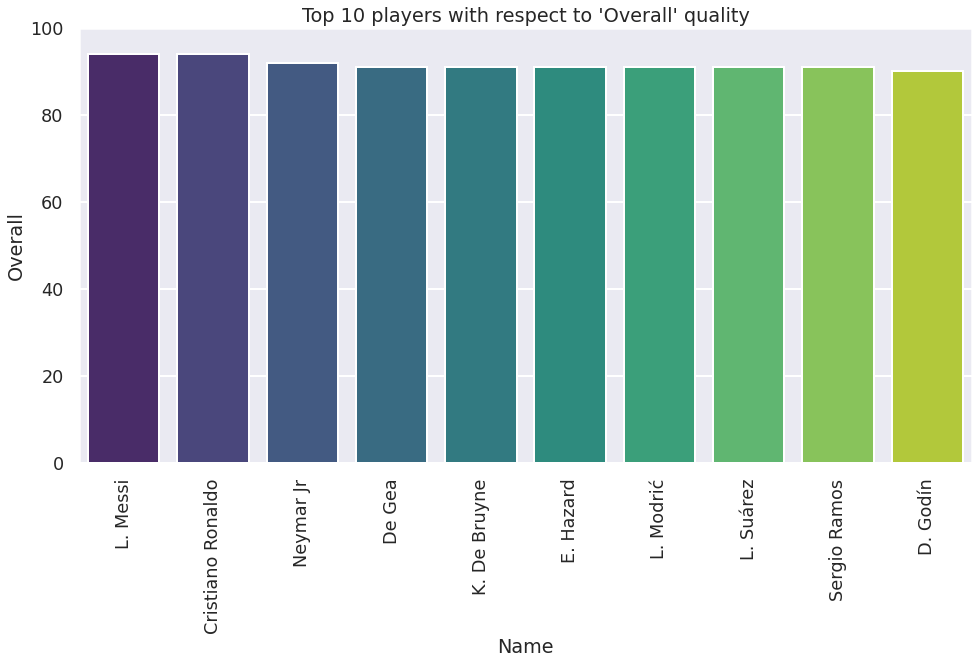

In [ ]:
plt.figure(figsize = (16,8))

sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.8)

ax = sns.barplot(x = data['Name'], y = data['Overall'], 
                 data = data, palette = 'viridis')

_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light')
# set title of graph
plt.title("Top 10 players with respect to 'Overall' quality")
# set y limit
plt.ylim(0,100)

plt.show()

###  Players with highest 'Release clause'

In [ ]:
release_clause = release_clause_in_M.sort_values(by = 'Release Clause',ascending = False).head(20)

In [ ]:
release_clause

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,LW,5'9,150lbs,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228.1
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,5'7,159lbs,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226.5
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,RCM,5'11,154lbs,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196.4
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,LF,5'8,163lbs,83,83,83,89,88,88,88,89,89,89,89,89,82,82,82,89,66,63,63,63,66,60,49,49,49,60,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172.1
25,K. Mbappé,19,France,88,95,Paris Saint-Germain,€81M,€100K,2118,Right,3.0,4.0,5.0,High/ Medium,RM,5'10,161lbs,85,85,85,87,87,87,87,87,86,86,86,86,78,78,78,86,66,62,62,62,66,62,54,54,54,62,77.0,88.0,77.0,82.0,78.0,90.0,77.0,63.0,73.0,91.0,96.0,96.0,92.0,87.0,83.0,79.0,75.0,83.0,71.0,78.0,62.0,38.0,88.0,82.0,70.0,86.0,34.0,34.0,32.0,13.0,5.0,7.0,11.0,6.0,166.1
17,A. Griezmann,27,France,89,90,Atlético Madrid,€78M,€145K,2246,Left,4.0,3.0,4.0,High/ High,CAM,5'9,161lbs,86,86,86,87,87,87,87,87,86,86,86,86,80,80,80,86,70,67,67,67,70,67,61,61,61,67,82.0,90.0,84.0,83.0,87.0,88.0,84.0,78.0,76.0,90.0,88.0,85.0,90.0,90.0,80.0,80.0,90.0,83.0,62.0,82.0,69.0,35.0,91.0,83.0,79.0,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165.8
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,€455K,2346,Right,5.0,4.0,3.0,High/ Medium,RS,6'0,190lbs,87,87,87,86,87,87,87,86,85,85,85,84,79,79,79,84,69,68,68,68,69,66,63,63,63,66,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,164.0
16,H. Kane,24,England,89,91,Tottenham Hotspur,€83.5M,€205K,2165,Right,3.0,4.0,3.0,High/ High,ST,6'2,196lbs,86,86,86,82,84,84,84,82,82,82,82,81,79,79,79,81,65,66,66,66,65,62,60,60,60,62,75.0,94.0,85.0,80.0,84.0,80.0,78.0,68.0,82.0,84.0,68.0,72.0,71.0,91.0,71.0,88.0,78.0,89.0,84.0,85.0,76.0,35.0,93.0,80.0,90.0,89.0,56.0,36.0,38.0,8.0,10.0,11.0,14.0,11.0,160.7
11,T. Kroos,28,Germany,90,90,Real Madrid,€76.5M,€355K,2190,Right,4.0,5.0,3.0,Medium/ Medium,LCM,6'0,168lbs,78,78,78,81,82,82,82,81,84,84,84,82,86,86,86,82,79,82,82,82,79,77,72,72,72,77,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156.8
30,Isco,26,Spain,88,91,Real Madrid,€73.5M,€315K,2137,Right,3.0,3.0,4.0,High/ Medium,LW,5'9,174lbs,76,76,76,84,83,83,83,84,86,86,86,83,83,83,83

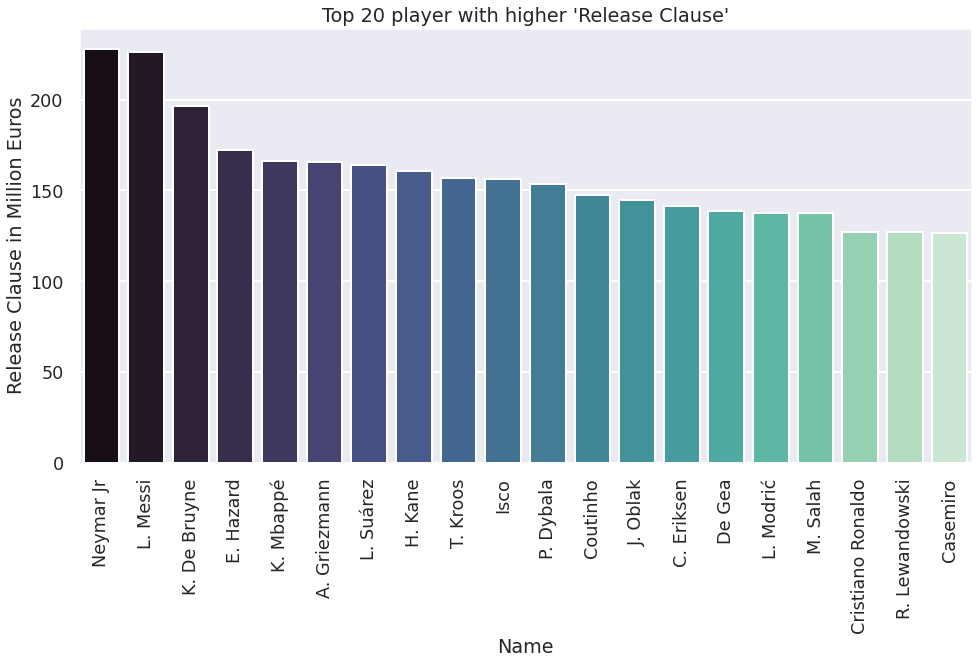

In [ ]:
plt.figure(figsize=(16,8))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.8)
# barplot
ax = sns.barplot(x = release_clause['Name'], y = release_clause['Release Clause']
                 , data = release_clause, palette = 'mako')

_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light')

# set title of graph
plt.title("Top 20 player with higher 'Release Clause'")

# set y label
plt.ylabel('Release Clause in Million Euros')

plt.show();

### Players with highest market value

In [ ]:
Value_in_M = Value_in_M.sort_values(by = 'Value', ascending = False)

In [ ]:
data = Value_in_M.head(20)
data.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118.5,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,LW,5'9,150lbs,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
0,L. Messi,31,Argentina,94,94,FC Barcelona,110.5,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,5'7,159lbs,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,102.0,€355K,2281,Right,4.0,5.0,4.0,High/ High,RCM,5'11,154lbs,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,E. Hazard,27,Belgium,91,91,Chelsea,93.0,€340K,2142,Right,4.0,4.0,4.0,High/ Medium,LF,5'8,163lbs,83,83,83,89,88,88,88,89,89,89,89,89,82,82,82,89,66,63,63,63,66,60,49,49,49,60,81.0,84.0,61.0,89.0,80.0,95.0,83.0,79.0,83.0,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
15,P. Dybala,24,Argentina,89,94,Juventus,89.0,€205K,2092,Left,3.0,3.0,4.0,High/ Medium,LF,5'10,165lbs,83,83,83,87,86,86,86,87,87,87,87,86,79,79,79,86,62,58,58,58,62,56,45,45,45,56,82.0,84.0,68.0,87.0,88.0,92.0,88.0,88.0,75.0,92.0,87.0,83.0,91.0,86.0,85.0,82.0,75.0,80.0,65.0,88.0,48.0,32.0,84.0,87.0,86.0,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,€153.5M


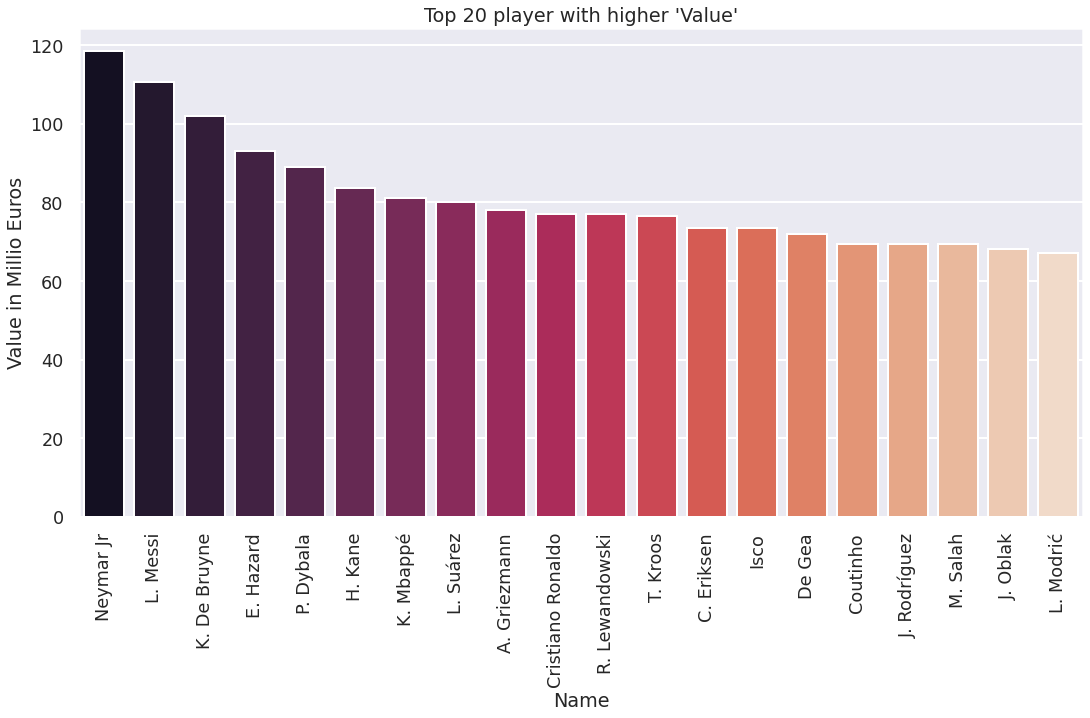

In [ ]:
plt.figure(figsize=(18,9))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.8)

# barplot
sns.barplot(x = data['Name'], y = data['Value'], data = data,palette ='rocket')

_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light')

# set title of graph
plt.title("Top 20 player with higher 'Value'")

# set y label
plt.ylabel('Value in Millio Euros')

plt.show();

### Top earning player

In [ ]:
Wage_in_K.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,565,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,5'7,159lbs,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,405,2228,Right,5.0,4.0,5.0,High/ Low,ST,6'2,183lbs,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,290,2143,Right,5.0,5.0,5.0,High/ Medium,LW,5'9,150lbs,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,260,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,355,2281,Right,4.0,5.0,4.0,High/ High,RCM,5'11,154lbs,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
wage_df = Wage_in_K.sort_values(by = 'Wage', ascending = False)
wage = wage_df.head(15)
wage

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,565,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,5'7,159lbs,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
7,L. Suárez,31,Uruguay,91,91,FC Barcelona,€80M,455,2346,Right,5.0,4.0,3.0,High/ Medium,RS,6'0,190lbs,87,87,87,86,87,87,87,86,85,85,85,84,79,79,79,84,69,68,68,68,69,66,63,63,63,66,77.0,93.0,77.0,82.0,88.0,87.0,86.0,84.0,64.0,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
6,L. Modrić,32,Croatia,91,91,Real Madrid,€67M,420,2280,Right,4.0,4.0,4.0,High/ High,RCM,5'8,146lbs,77,77,77,85,84,84,84,85,87,87,87,86,88,88,88,86,82,81,81,81,82,79,71,71,71,79,86.0,72.0,55.0,93.0,76.0,90.0,85.0,78.0,88.0,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,405,2228,Right,5.0,4.0,5.0,High/ Low,ST,6'2,183lbs,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
8,Sergio Ramos,32,Spain,91,91,Real Madrid,€51M,380,2201,Right,4.0,3.0,3.0,High/ Medium,RCB,6'0,181lbs,73,73,73,70,71,71,71,70,71,71,71,72,75,75,75,72,81,84,84,84,81,84,87,87,87,84,66.0,60.0,91.0,78.0,66.0,63.0,74.0,72.0,77.0,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,355,2281,Right,4.0,5.0,4.0,High/ High,RCM,5'11,154lbs,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
36,G. Bale,28,Wales,88,88,Real Madrid,€60M,355,2279,Left,4.0,3.0,4.0,High/ Medium,ST,6'1,181lbs,86,86,86,86,86,86,86,86,85,85,85,85,80,80,80,85,73,70,70,70,73,71,67,67,67,71,87.0,86.0,84.0,85.0,85.0,87.0,90.0,87.0,80.0,85.0,94.0,95.0,82.0,85.0,65.0,92.0,87.0,75.0,80.0,91.0,65.0,59.0,85.0,79.0,76.0,86.0,54.0,55.0,52.0,15.0,15.0,11.0,5.0,6.0,€123M
11,T. Kroos,28,Germany,90,90,Real Madrid,€76.5M,355,2190,Right,4.0,5.0,3.0,Medium/ Medium,LCM,6'0,168lbs,78,78,78,81,82,82,82,81,84,84,84,82,86,86,86,82,79,82,82,82,79,77,72,72,72,77,88.0,76.0,54.0,92.0,82.0,81.0,86.0,84.0,93.0,90.0,64.0,62.0,70.0,89.0,71.0,87.0,30.0,75.0,73.0,92.0,60.0,82.0,79.0,86.0,73.0,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,€156.8M
32,Coutinho,26,Brazil,88,89,FC Barcelona,€69.5M,340,2175,Right,3.0,4.0,5.0,High/ High,LW,5'8,150lbs,79,79,79,86,85,85,85,86,87,87,87,85,83,83,83,85,71,70,70,70,71,67,58,58,58,67,79.0,79.0,48.0,88.0,75.0,91.0,91.0,86.0,83.0,92.0,89.0,75.0,92.0,83.0,93.0,83.0,59.0,79.0,61.0,93.0,59.0,49.0,84.0,90.0,70.0,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,€147.7M
5,E. Hazard,27,Belgium,91,91,Chelsea,€93M,340,2142,Right,4.0,4.0,4.0,High/ Medium,LF,5'8,163lbs,83,83,83,89,88,88,88,89,89,89,89,89,82,82,82,89,66,63,63,63,66,60,49,49,49,60

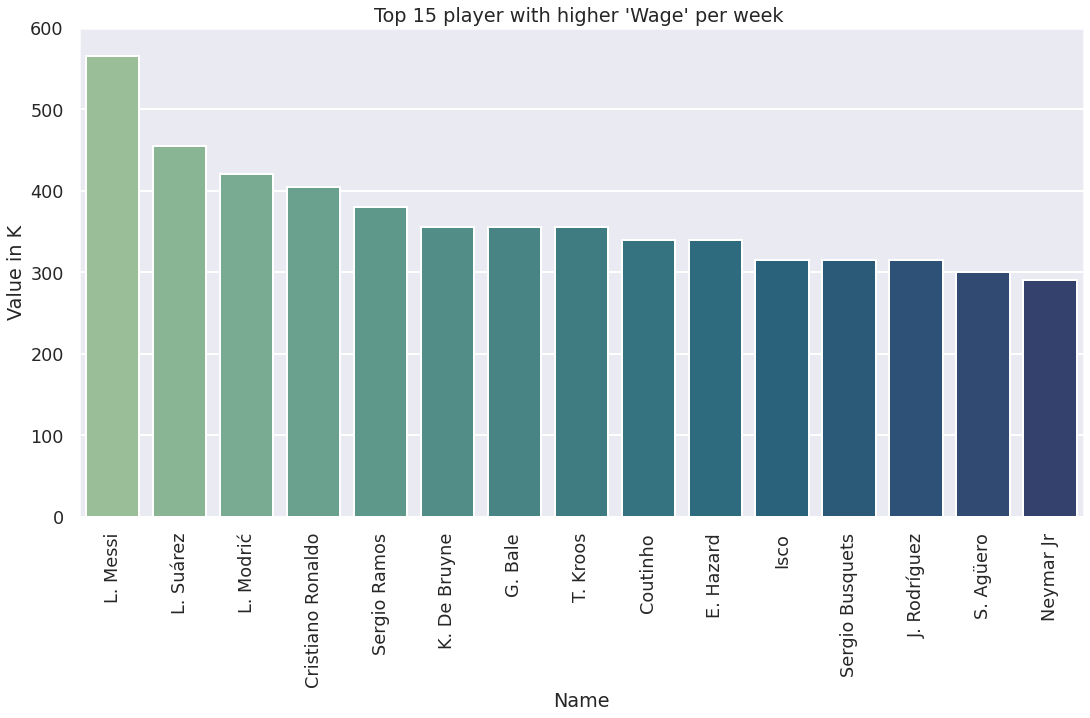

In [ ]:
plt.figure(figsize=(18,9))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.8)

# barplot
sns.barplot(x = wage['Name'], y = wage['Wage'], data = wage,palette ='crest')
_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light')

# set title 
plt.title("Top 15 player with higher 'Wage' per week ")

# set y label
plt.ylabel('Value in K')

# set y limit
plt.ylim((0,600))

plt.show();

### Overall by Preferred Foot status

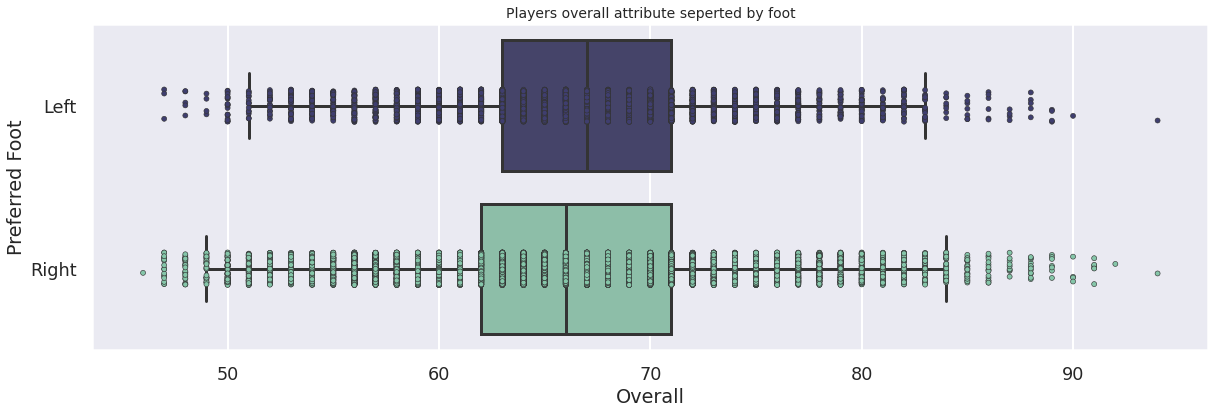

In [ ]:
plt.figure(figsize=(20,6))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.8)


# boxplot
sns.boxplot(y = df['Preferred Foot'], x = df['Overall'], data = df,
     palette=["#3f3e6fd1", "#85c6a9"], fliersize = 0, orient = 'h')

# stripplot
sns.stripplot(y = df['Preferred Foot'], x = df['Overall'], data = df,
     linewidth = 0.6, palette=["#3f3e6fd1", "#85c6a9"], orient = 'h')
#set title
plt.title('Players overall attribute seperted by foot',fontsize= 14)
# set y label
plt.ylabel('Preferred Foot')



plt.show();

In [ ]:
preferred_foot = df['Preferred Foot'].value_counts(normalize = True)
preferred_foot

Right    0.76772
Left     0.23228
Name: Preferred Foot, dtype: float64

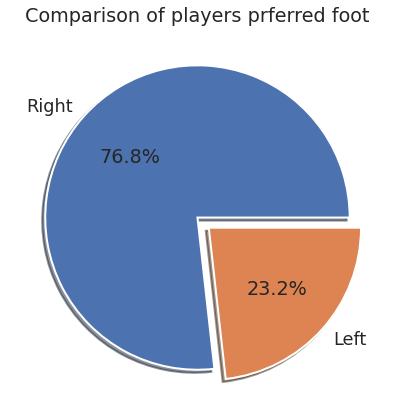

In [ ]:
plt.figure(figsize = (10,7))

# pie chart
plt.pie(preferred_foot, labels = preferred_foot.index, autopct = '%1.1f%%',
        shadow = True, explode = [0, 0.1])

# set title
plt.title('Comparison of players prferred foot')

plt.show();

In [ ]:
# descriptive statistics

pd.DataFrame(df.groupby('Preferred Foot')['Overall'].describe())

,count,mean,std,min,25%,50%,75%,max
Preferred Foot,,,,,,,,
Left,4162.0,66.790485,6.567369,47.0,63.0,67.0,71.0,94.0
Right,13756.0,66.069279,7.026703,46.0,62.0,66.0,71.0,94.0


### Top spending Clubs on the basis of 'Wage'

In [ ]:
x = pd.DataFrame(wage_df.groupby('Club')['Wage'].agg(sum))

In [ ]:
wage_per_club = x.sort_values(by = 'Wage', ascending = False )

In [ ]:
wage_per_club_top_15 = wage_per_club[:15]

In [ ]:
wage_per_club_top_15

,Wage
Club,
Real Madrid,5017
FC Barcelona,4837
Manchester City,3741
Manchester United,3391
Juventus,3292
Chelsea,3249
Liverpool,2902
Tottenham Hotspur,2623
Arsenal,2588


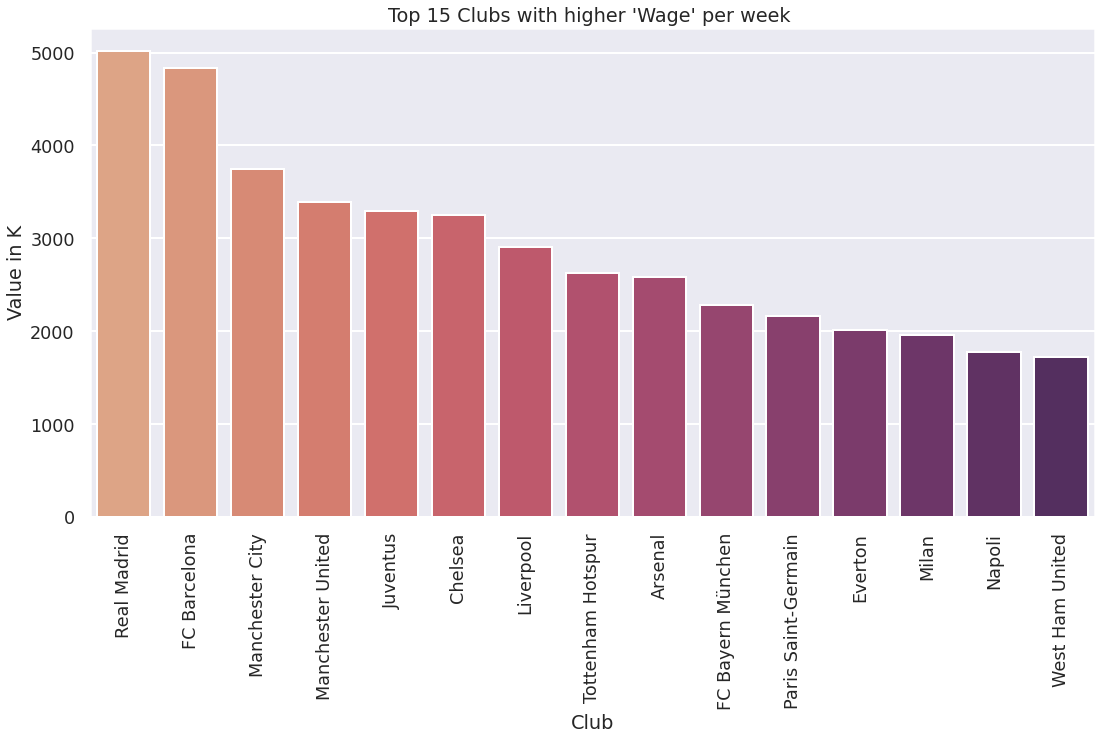

In [ ]:
plt.figure(figsize=(18,9))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.8)

# barplot
sns.barplot(x = wage_per_club_top_15.index, y = wage_per_club_top_15['Wage'],
            data = wage_per_club_top_15,palette ='flare')

_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light')

# set title
plt.title("Top 15 Clubs with higher 'Wage' per week ")

# set y label
plt.ylabel('Value in K')

plt.show();

In [ ]:
y = pd.DataFrame(wage_df.groupby('Club')['Wage'].describe())

In [ ]:
# descriptive statistics

pd.merge(y,wage_per_club_top_15 , left_index=True,
         right_index=True).sort_values(by='Wage',ascending=False).T

Club,Real Madrid,FC Barcelona,Manchester City,Manchester United,Juventus,Chelsea,Liverpool,Tottenham Hotspur,Arsenal,FC Bayern München,Paris Saint-Germain,Everton,Milan,Napoli,West Ham United
count,33.000000,33.000000,33.000000,33.000000,25.000000,33.000000,33.000000,33.000000,33.000000,29.000000,30.000000,32.000000,27.000000,25.000000,32.000000
mean,152.030303,146.575758,113.363636,102.757576,131.680000,98.454545,87.939394,79.484848,78.424242,78.827586,72.033333,62.781250,72.481481,71.080000,53.750000
std,126.343402,134.515573,95.428906,69.437936,78.196718,73.331478,62.824627,55.762398,62.443490,71.447818,64.116534,37.680948,44.385870,35.389405,34.399925
min,9.000000,4.000000,3.000000,8.000000,5.000000,2.000000,3.000000,3.000000,4.000000,2.000000,5.000000,2.000000,4.000000,19.000000,2.000000
25%,26.000000,21.000000,24.000000,39.000000,91.000000,39.000000,36.000000,33.000000,21.000000,5.000000,16.750000,30.750000,54.000000,47.000000,16.000000
50%,120.000000,125.000000,120.000000,110.000000,125.000000,98.000000,94.000000,79.000000,81.000000,85.000000,65.000000,71.000000,73.000000,64.000000,65.000000
75%,240.000000,205.000000,175.000000,140.000000,160.000000,140.000000,120.000000,115.000000,115.000000,110.000000,90.750000,89.000000,85.000000,87.000000,80.000000
max,420.000000,565.000000,355.000000,260.000000,405.000000,340.000000,255.000000,205.000000,265.000000,315.000000,290.000000,130.000000,245.000000,165.000000,120.000000
Wage,5017.000000,4837.000000,3741.000000,3391.000000,3292.000000,3249.000000,2902.000000,2623.000000,2588.000000,2286.000000,2161.000000,2009.000000,1957.000000,1777.000000,1720.000000


### Top  player of the respective position

In [ ]:
df.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Height', 'Weight',
       'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM',
       'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB',
       'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
       'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility',
       'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength',
       'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision',
       'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle',
       'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause'],
      dtype='object')

In [ ]:
forwards_df = df[['Name','LS', 'ST', 'RS',
       'LW', 'LF', 'CF', 'RF', 'RW']]

midfielder_df = df[['Name','LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM',
       'RCM', 'RM','LDM', 'CDM', 'RDM']]

defenders_df = df[['Name','LWB', 'RWB', 'LB', 'LCB', 'CB',
       'RCB', 'RB']]

In [ ]:
forwards_df.head()

,Name,LS,ST,RS,LW,LF,CF,RF,RW
0,L. Messi,88,88,88,92,93,93,93,92
1,Cristiano Ronaldo,91,91,91,89,90,90,90,89
2,Neymar Jr,84,84,84,89,89,89,89,89
3,De Gea,0,0,0,0,0,0,0,0
4,K. De Bruyne,82,82,82,87,87,87,87,87


In [ ]:
forwards_df['Mean'] = forwards_df.mean(axis=1)

In [ ]:
forwards_df = forwards_df.sort_values(by='Mean', ascending = False)

### Top 5 forwards

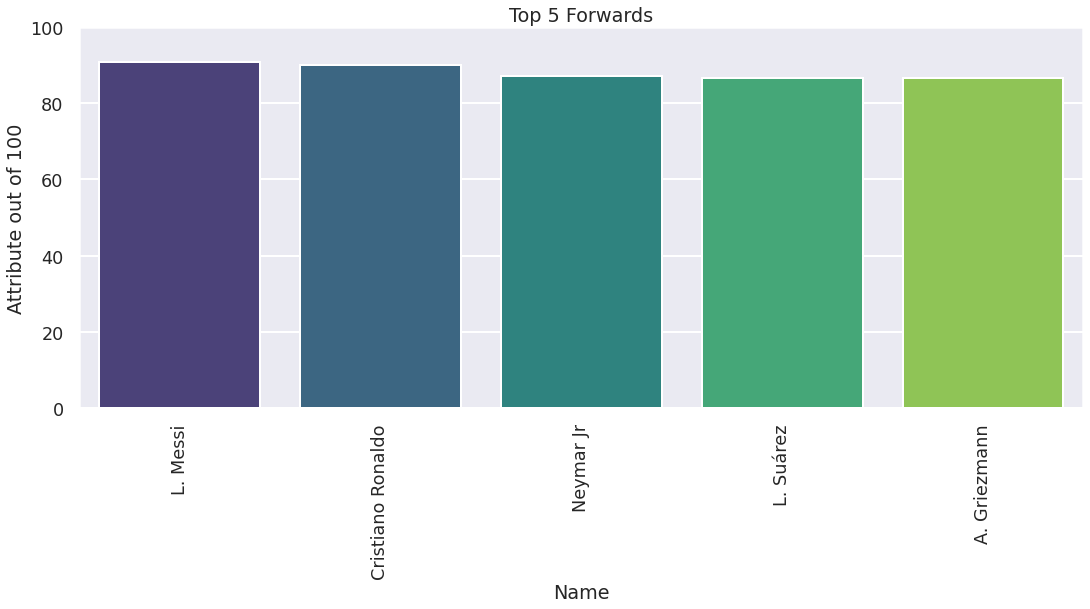

In [ ]:
plt.figure(figsize=(18,7))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.8)


sns.barplot(x = forwards_df.head()['Name'], y = forwards_df.head()['Mean'],
            data = forwards_df.head(),palette ='viridis')
_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light')
# set title
plt.title('Top 5 Forwards')
# set y label
plt.ylabel('Attribute out of 100')
# set y limit
plt.ylim((0,100))

plt.show();

###  Top 5 midfielders

In [ ]:
midfielder_df.head()

,Name,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LDM,CDM,RDM
0,L. Messi,93,93,93,91,84,84,84,91,61,61,61
1,Cristiano Ronaldo,88,88,88,88,81,81,81,88,61,61,61
2,Neymar Jr,89,89,89,88,81,81,81,88,60,60,60
3,De Gea,0,0,0,0,0,0,0,0,0,0,0
4,K. De Bruyne,88,88,88,88,87,87,87,88,77,77,77


In [ ]:
midfielder_df['Mean'] = midfielder_df.mean(axis=1)

In [ ]:
midfielder_df = midfielder_df.sort_values(by='Mean', ascending = False)

In [ ]:
midfielder_df.head()

,Name,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LDM,CDM,RDM,Mean
6,L. Modrić,87,87,87,86,88,88,88,86,81,81,81,85.454545
4,K. De Bruyne,88,88,88,88,87,87,87,88,77,77,77,84.727273
35,Marcelo,84,84,84,85,84,84,84,85,83,83,83,83.909091
11,T. Kroos,84,84,84,82,86,86,86,82,82,82,82,83.636364
101,R. Nainggolan,81,81,81,80,83,83,83,80,84,84,84,82.181818


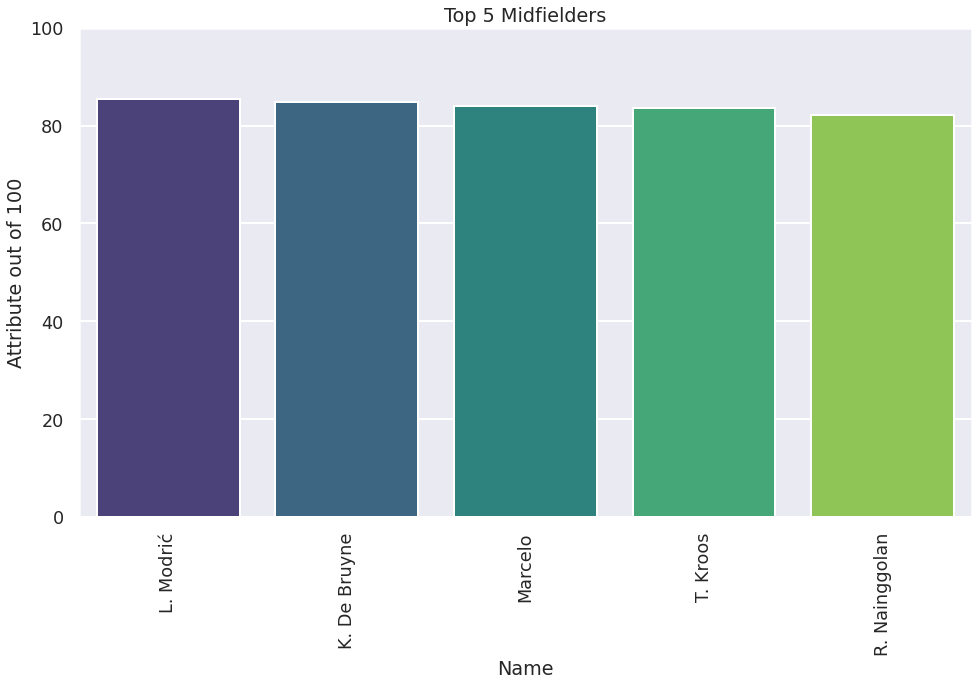

In [ ]:
plt.figure(figsize=(16,9))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.8)


sns.barplot(x = midfielder_df.head()['Name'], y = midfielder_df.head()['Mean'],
            data = midfielder_df.head(),palette ='viridis')
_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light')
# set title 
plt.title('Top 5 Midfielders')
# set y label
plt.ylabel('Attribute out of 100')
# set y limit
plt.ylim((0,100))

plt.show();

### Top 5 Defenders

In [ ]:
defenders_df.head()

,Name,LWB,RWB,LB,LCB,CB,RCB,RB
0,L. Messi,64,64,59,47,47,47,59
1,Cristiano Ronaldo,65,65,61,53,53,53,61
2,Neymar Jr,65,65,60,47,47,47,60
3,De Gea,0,0,0,0,0,0,0
4,K. De Bruyne,77,77,73,66,66,66,73


In [ ]:
defenders_df['Mean'] = defenders_df.mean(axis=1)

defenders_df = defenders_df.sort_values(by='Mean', ascending = False)

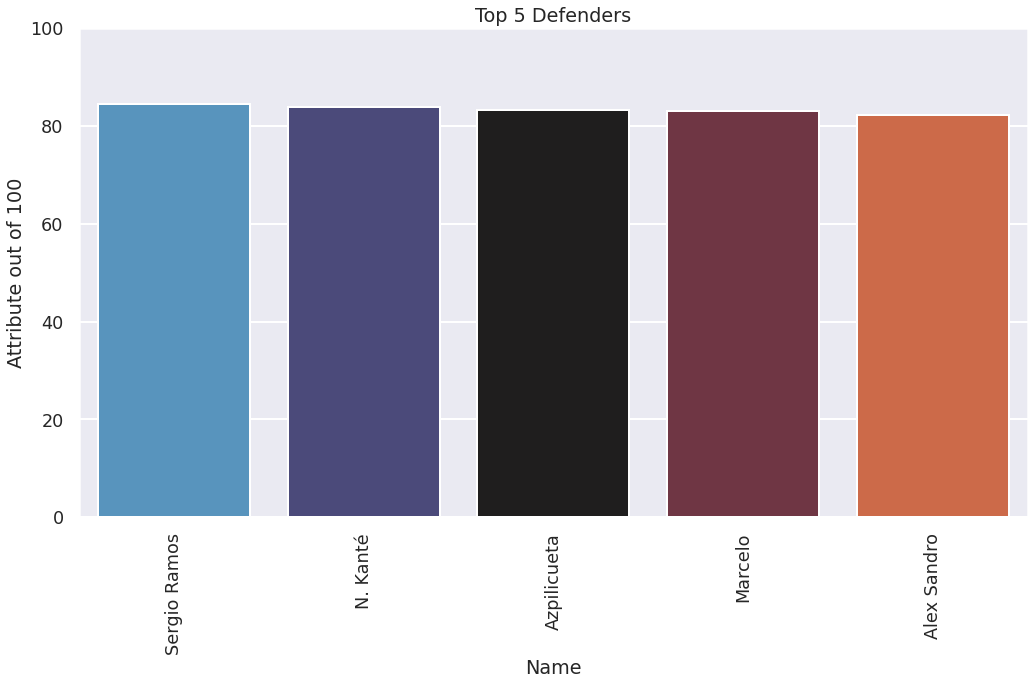

In [ ]:
plt.figure(figsize=(17,9))

# set theme
sns.set_theme(style = 'darkgrid', context = 'poster', color_codes = True,
             font = 'sans-serif', font_scale = 0.8)


sns.barplot(x = defenders_df.head()['Name'], y = defenders_df.head()['Mean'],
            data = defenders_df.head(),palette ='icefire')

_ = plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light')

# set title
plt.title('Top 5 Defenders')

# set y label
plt.ylabel('Attribute out of 100')

# set y limit
plt.ylim((0,100))

plt.show();

In [ ]:
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Position,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,RF,5'7,159lbs,88,88,88,92,93,93,93,92,93,93,93,91,84,84,84,91,64,61,61,61,64,59,47,47,47,59,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,ST,6'2,183lbs,91,91,91,89,90,90,90,89,88,88,88,88,81,81,81,88,65,61,61,61,65,61,53,53,53,61,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,LW,5'9,150lbs,84,84,84,89,89,89,89,89,89,89,89,88,81,81,81,88,65,60,60,60,65,60,47,47,47,60,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,GK,6'4,168lbs,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,RCM,5'11,154lbs,82,82,82,87,87,87,87,87,88,88,88,88,87,87,87,88,77,77,77,77,77,73,66,66,66,73,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


## Observation

1. Initaially the dataset consists of 18207 rows and 89 columns.
2. With respect to overall attribute L.Messi, Cristiano Ronaldo and Neymar Jr are the top 3 players where Messi and Neymar are from South America nationality and Ronaldo is form European nationality.
3. Neymar Jr, L. Messi, K. De Bruyne are the player who have their release clause at a maximum compared to other.
4. Once again Neymar Jr, L. Messi, K. De Bruyne are players wiyh higher market value.
5. When it comes to wage for players L. Messi, L. Suárez, 
L. Modrić are the players who earn more weekly. 
6. As of preferred foot 76.8% pf the players prefer left where as 23.2% of the players prefer right. The variation in percentage is maybe due to handled way of null values in the respective column.
7. Real Madrid, FC Barcelona, Manchester City etc. are the teams which spend more money on wages.